In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"]



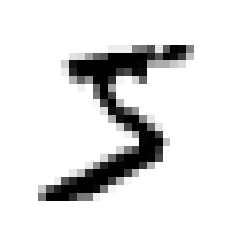

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


def show_digit(digit):
    some_digit = digit
    some_digit_image = some_digit.reshape(28, 28)
    plt.imshow(some_digit_image, cmap=mpl.cm.binary)
    plt.axis("off")
    plt.show()

show_digit(X[0])

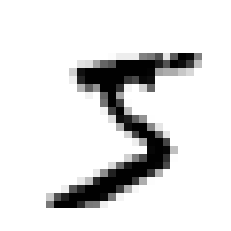

In [3]:
# a function to augment a image by shifting it up, down, left and right 
import numpy as np
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = np.roll(image, dy, axis=0)
    shifted_image = np.roll(shifted_image, dx, axis=1)
    return shifted_image.reshape((784,))

show_digit(shift_image(X[0], 1,1))

> i might have taken advantage of the my beloved github copilot :)

Now to do my best to use this function to actually augment the data and making a new model using the augmented data.

In [4]:
# for every image in the dataset, we will create a new image by shifting it up, down, left and right
for row in X:
    break
    X = np.vstack([X, shift_image(row, 0, 1)])  # shift up
    X = np.vstack([X, shift_image(row, 0, -1)])  # shift down
    X = np.vstack([X, shift_image(row, 1, 0)])  # shift left
    X = np.vstack([X, shift_image(row, -1, 0)])  # shift right

X.shape


(70000, 784)

Its been 15 minutes and the cell above is still running. I give up i will look at the solution.

In [6]:
from scipy.ndimage import shift


In [7]:
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])


In [8]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]


In [9]:
X_train_augmented = list(X_train)
y_train_augmented = list(y_train)

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)


In [10]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]


In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=4, weights="distance") # hyperparameters from the grid search

In [13]:
knn_clf.fit(X_train_augmented, y_train_augmented)


KNeighborsClassifier(n_neighbors=4, weights='distance')

In [15]:
from sklearn.metrics import accuracy_score

y_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_pred)


0.9763

Yesss this is **improvement**